### In case of positive hydrostatic strain i.e $\text{tr}(\boldsymbol{\epsilon})\geq 0$
$\langle p \rangle_+ = p = \boldsymbol{I}: \boldsymbol{\sigma}_{vol} = \boldsymbol{I}: \mathbb{I}_{vol}\mathbb{C}  \boldsymbol{\epsilon}$    and      $\langle p \rangle_- = 0 $

$\mathbb{C}_{mod} = \mathbb{C}_{+} = s^2\left(\mathbb{I}_{vol}\mathbb{C} + \mathbb{I}_{dev}\mathbb{C}\right) = s^2 \mathbb{C}$

### In case of negative hydrostatic strain $\text{tr}(\boldsymbol{\epsilon})< 0$
$\langle p \rangle_+ = 0 $   and    $\langle p \rangle_- = p =  \boldsymbol{I}: \boldsymbol{\sigma}_{vol} = \boldsymbol{I}:\mathbb{I}_{vol}\mathbb{C}  \boldsymbol{\epsilon}$

$\mathbb{C}_{mod} = \mathbb{C}_{-} = s^2\bigl(\mathbb{I}_{dev}\mathbb{C}\bigr) + \mathbb{I}_{vol}\mathbb{C}$

 ## Strong Form in terms of $\mathbb{C}_{mod}$ and $\mathcal{H}(\mathcal{E})$
 
 $\nabla \cdot \boldsymbol{\sigma} = {\bf{0}}$
 
 $ \nabla \cdot \biggl(G_cl\boldsymbol{A}\nabla s\biggr) - 2s\mathcal{H}(\mathcal{E})  + \frac{G_c}{l}\left(1-s\right) = 0$
 
 $ \nabla \cdot \biggl(\boldsymbol{\kappa} \nabla \mathcal{T} \biggr) - \rho c \dot{T} = 0 $ 

where 

$\boldsymbol{\sigma} = \mathbb{C}_{mod} \left(\boldsymbol{\epsilon} - \alpha (\mathcal{T}- \mathcal{T}_0)\right) $



$\mathcal{E}  = \frac{1}{2}\biggl(\langle p \rangle_+\boldsymbol{I}:\mathbb{I}_{vol}\boldsymbol{\epsilon} + \mathbb{I}_{dev}\mathbb{C}\boldsymbol{\epsilon}:\mathbb{I}_{dev}\boldsymbol{\epsilon}\biggr) $

$\mathcal{H}(f) = \text{max}_{\tau \in [0,t]}f(\tau)$

 # Weak Form

### For Mechanical part

 $a(\boldsymbol{u}, {\boldsymbol{v}}) = \int_{\Omega} \bigl( \mathbb{C}_{mod}\mathbb{\epsilon}: \nabla \boldsymbol{v} \bigr)d\Omega  $

### For phase-field part
 
 $ a(s,\phi) = \int_{\Omega}\bigl(G_cl\nabla s \cdot \nabla \phi + 2s \phi\mathcal{H}({\mathcal{E}}) +  \frac{G_c}{l} s \phi\bigr)d\Omega$

 $ l(\phi) = \int_{\Omega}\frac{G_c}{l}\phi d{\Omega}$

### For temperature part

$ a(w,\mathcal{T}) = \int_{\Omega} \bigl(\nabla w \bigr) \cdot \bigl(\boldsymbol{\kappa} \nabla \mathcal{T} \bigr) d{\Omega} + \int w\rho c \dot{T}$

$l (w) = 0$

In [1]:
using GridapGmsh
using Gmsh: gmsh
using Gridap
using Gridap.Geometry
using Gridap.TensorValues
using Plots

In [2]:
const T0 = 0
const TAppMax = T0+1.0e-6
const delt = 0.1
const tMax = 10.1
const uMax = 0.035e-3
AppVel = uMax/tMax
uMin = 0
uTran = uMax

3.5e-5

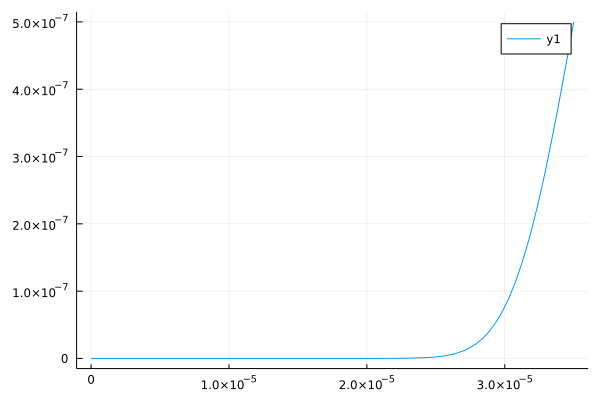

In [3]:
using SymPy

x,x₁ = symbols("x,x₁", real = true)

heaviside(x) = 0.5 * (sign(x) + 1)
interval(x, a, b) = heaviside(x-a) - heaviside(x-b)

hS = uMax/10
F(x) = (T0 - TAppMax) * interval(x,-4*hS+uMin,uTran)
wₕ(x,x₁) = (1/(sqrt(2*pi)*hS))*exp(-(x-x₁)^2/(2*hS^2))
smoothT = SymPy.integrate(F(x₁)*wₕ(x,x₁),(x₁,-4*hS,uMax)) +  TAppMax
plot(smoothT,0,uMax)

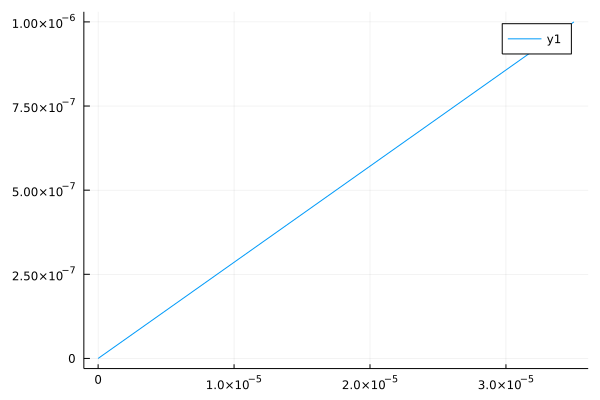

In [4]:
function Tfun(u)  
    if u <= uTran
      return ((TAppMax - T0)/uTran)*u + T0
    else
     return  TAppMax
    end
end 
plot(Tfun,0,uMax)

In [5]:
uAppVec = range(0,uMax,length = Int64(floor(tMax/delt)))

AppTOption = 2 ## 1 for smooth and otherwise linear than constant

if AppTOption == 1
    TAppVec = smoothT.(uAppVec)
  else
    TAppVec = Tfun.(uAppVec) 
end 

100-element Array{Float64,1}:
 0.0
 1.0101010101010102e-8
 2.0202020202020204e-8
 3.0303030303030305e-8
 4.040404040404041e-8
 5.0505050505050506e-8
 6.060606060606061e-8
 7.070707070707071e-8
 8.080808080808082e-8
 9.090909090909091e-8
 1.0101010101010101e-7
 1.1111111111111112e-7
 1.2121212121212122e-7
 ⋮
 8.88888888888889e-7
 8.989898989898991e-7
 9.090909090909093e-7
 9.191919191919192e-7
 9.292929292929293e-7
 9.393939393939395e-7
 9.494949494949496e-7
 9.595959595959596e-7
 9.696969696969698e-7
 9.797979797979799e-7
 9.8989898989899e-7
 1.0e-6

## Definitions of Tensorial Quantities:

$\boldsymbol{I} = \delta_{ij} \boldsymbol{e}_i\otimes\boldsymbol{e}_j$

$\mathbb{I} = \boldsymbol{I}\otimes\boldsymbol{I}$

$\mathbb{I}_{sym} = \frac{1}{2}\biggl(\mathbb{I}+\mathbb{I}^T\biggr)$

$\mathbb{I}_{skw} = \frac{1}{2}\biggl(\mathbb{I}-\mathbb{I}^T\biggr)$

$\mathbb{I}_{vol} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)$

$\mathbb{I}_{dev} = \mathbb{I}_{sym} - \mathbb{I}_{vol}$

$\boldsymbol{\epsilon}_{vol} = \frac{1}{3}\text{tr}(\boldsymbol{\epsilon}) \boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{\epsilon}:\boldsymbol{I}\biggr)\boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)\boldsymbol{\epsilon} = \mathbb{I}_{vol} \boldsymbol{\epsilon} $

$\boldsymbol{\epsilon}_{dev} = \boldsymbol{\epsilon} - \boldsymbol{\epsilon}_{vol} = \biggl(\mathbb{I}_{sym} -  \mathbb{I}_{vol}\biggl) \boldsymbol{\epsilon} = \mathbb{I}_{dev} \boldsymbol{\epsilon}$

$\boldsymbol{\sigma}_{vol} = p \boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{\sigma}:\boldsymbol{I}\biggr)\boldsymbol{I} = \frac{1}{3}\biggl(\boldsymbol{I}\otimes\boldsymbol{I}\biggr)\boldsymbol{\sigma} = \mathbb{I}_{vol} \boldsymbol{\sigma} = \mathbb{I}_{vol}\mathbb{C} \boldsymbol{\epsilon}$

$\boldsymbol{\sigma}_{dev} = \boldsymbol{\sigma} - \boldsymbol{\sigma}_{vol} = \biggl(\mathbb{I}_{sym} -  \mathbb{I}_{vol}\biggl) \boldsymbol{\sigma} = \mathbb{I}_{dev} \boldsymbol{\sigma}=\mathbb{I}_{dev} \mathbb{C} \boldsymbol{\epsilon}$

In [6]:
I2 = SymTensorValue{2,Float64}(1.0,0.0,1.0)
I4 = I2⊗I2
I4_sym = one(SymFourthOrderTensorValue{2,Float64})
I4_vol = (1.0/3)*I4
I4_dev = I4_sym - I4_vol

SymFourthOrderTensorValue{2,Float64,9}(0.6666666666666667, 0.0, -0.3333333333333333, 0.0, 0.5, 0.0, -0.3333333333333333, 0.0, 0.6666666666666667)

In [7]:
const L = 0.05
const lsp = L/100
const eps = L/100
const Lc = 0.2*L 
const beta = 3*π/4
const Lcx = -Lc*cos(beta)
const Lcy = Lc*sin(beta)
const hfc = lsp/4
const hf = lsp/4
const h = L/8
gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)
gmsh.model.geo.addPoint(0.0, 0.0, 0.0, h, 1)  
gmsh.model.geo.addPoint(L, 0.0, 0.0, h, 2) 
gmsh.model.geo.addPoint(L, L-eps, 0.0,h, 3) 
gmsh.model.geo.addPoint(L-Lcx, L-eps+Lcy, 0.0, hfc, 4)
gmsh.model.geo.addPoint(L-Lcx+eps, L+Lcy,0.0, hfc, 5)
gmsh.model.geo.addPoint(L+eps, L, 0.0,h, 6)
gmsh.model.geo.addPoint(2*L, L,0.0, h, 7)
gmsh.model.geo.addPoint(2*L, 2*L, 0.0, h, 8)
gmsh.model.geo.addPoint(L, 2*L, 0.0, h, 9)
gmsh.model.geo.addPoint(L, 3*L, 0.0, h, 10)
gmsh.model.geo.addPoint(0, 3*L, 0.0, h, 11)
gmsh.model.geo.addPoint(0, 2*L, 0.0, hf, 12)
gmsh.model.geo.addPoint(-L, 2*L, 0.0, h, 13)
gmsh.model.geo.addPoint(-L, L, 0.0, h, 14)
gmsh.model.geo.addPoint(0, L, 0.0, h, 15)
gmsh.model.geo.addPoint(0, 1.4*L, 0.0, h, 16)

16

In [8]:
gmsh.model.geo.addLine(1, 2, 1)
gmsh.model.geo.addLine(2, 3, 2)
gmsh.model.geo.addLine(3, 4, 3)
gmsh.model.geo.addLine(4, 5, 4)
gmsh.model.geo.addLine(5, 6, 5)
gmsh.model.geo.addLine(6, 7, 6)
gmsh.model.geo.addLine(7, 8, 7)
gmsh.model.geo.addLine(8, 9, 8)
gmsh.model.geo.addLine(9, 10, 9)
gmsh.model.geo.addLine(10, 11, 10)
gmsh.model.geo.addLine(11, 12, 11)
gmsh.model.geo.addLine(12, 13, 12)
gmsh.model.geo.addLine(13, 14, 13)
gmsh.model.geo.addLine(14, 15, 14)
gmsh.model.geo.addLine(15, 1, 15)
gmsh.model.geo.addLine(4, 16, 151)

151

In [9]:
gmsh.model.geo.addCurveLoop([12,13,14,15,1,2,3,4,5,6,7,8,9,10,11],1) 
gmsh.model.geo.addPlaneSurface([1], 1)
gmsh.model.addPhysicalGroup(2, [1],1)
gmsh.model.addPhysicalGroup(1, [1],1)
gmsh.model.addPhysicalGroup(1, [10],2)
gmsh.model.addPhysicalGroup(1, [13],3)
gmsh.model.addPhysicalGroup(1, [7],4)
gmsh.model.setPhysicalName(2, 1, "Domain")
gmsh.model.setPhysicalName(1, 1, "BottomEdge")
gmsh.model.setPhysicalName(1, 2, "TopEdge")
gmsh.model.setPhysicalName(1, 3, "LeftEdge")
gmsh.model.setPhysicalName(1, 4, "RightEdge")

gmsh.model.mesh.field.add("Distance", 1)
gmsh.model.mesh.field.setNumbers(1, "EdgesList", [151])

gmsh.model.mesh.field.add("Threshold", 2)
gmsh.model.mesh.field.setNumber(2, "IField", 1)
gmsh.model.mesh.field.setNumber(2, "LcMin", hf)
gmsh.model.mesh.field.setNumber(2, "LcMax", h)
gmsh.model.mesh.field.setNumber(2, "DistMin", 1.0*Lcy)
gmsh.model.mesh.field.setNumber(2, "DistMax", 1.0*Lc)

gmsh.model.mesh.field.setAsBackgroundMesh(2)

gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)
gmsh.write("CrushiformShapeWithInclinedCrack.msh")
gmsh.finalize()

Info    : Meshing 1D...
Info    : Meshing curve 1 (Line)
Info    : Meshing curve 2 (Line)
Info    : Meshing curve 3 (Line)
Info    : Meshing curve 4 (Line)
Info    : Meshing curve 5 (Line)
Info    : Meshing curve 6 (Line)
Info    : Meshing curve 7 (Line)
Info    : Meshing curve 8 (Line)
Info    : Meshing curve 9 (Line)
Info    : Meshing curve 10 (Line)
Info    : Meshing curve 11 (Line)
Info    : Meshing curve 12 (Line)
Info    : Meshing curve 13 (Line)
Info    : Meshing curve 14 (Line)
Info    : Meshing curve 15 (Line)
Info    : Meshing curve 151 (Line)
Info    : Done meshing 1D (0.013396 s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Delaunay)
Info    : Done meshing 2D (2.0628 s)
Info    : 64183 vertices 128020 elements
Info    : Writing 'CrushiformShapeWithInclinedCrack.msh'...
Info    : Done writing 'CrushiformShapeWithInclinedCrack.msh'


In [10]:
model = GmshDiscreteModel("CrushiformShapeWithInclinedCrack.msh")
writevtk(model,"CrushiformShapeWithInclinedCrack")

Info    : Reading 'CrushiformShapeWithInclinedCrack.msh'...
Info    : 33 entities
Info    : 63823 nodes
Info    : 127438 elements
Info    : Done reading 'CrushiformShapeWithInclinedCrack.msh'


3-element Array{Array{String,1},1}:
 ["CrushiformShapeWithInclinedCrack_0.vtu"]
 ["CrushiformShapeWithInclinedCrack_1.vtu"]
 ["CrushiformShapeWithInclinedCrack_2.vtu"]

In [11]:
using Gridap.Geometry
labels = get_face_labeling(model)
dimension = 2
mat_tags = get_face_tag(labels,dimension)

127406-element Array{Int8,1}:
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 ⋮
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5

In [12]:
const Mat_tag = get_tag_from_name(labels,"Domain")

5

### Elastic Properties from (A phase-field model of thermo-elastic coupled brittle fracture with
### explicit time integration)

In [13]:
const E_mat = 218.4e3
const ν_mat = 0.2

0.2

#### Input fracture parameters

In [14]:
const Gc = 2.0e-4
const η = 1e-15

1.0e-15

#### Input Thermal parameter 

In [15]:
const α = 6.0e-4
const c = 1.0
const κ_mat = 1.0
const ρ = 0.0

0.0

## COnstitutive Matrices

### Elastic stiffness tensor

In [16]:
function ElasFourthOrderConstTensor(E ,ν , PlanarState)
# 1 for Plane Stress and 2 Plane Strain Condition
if PlanarState == 1
C1111 = E /(1 -ν *ν )
C1122 = (ν *E ) /(1 -ν *ν )
C1112 = 0.0
C2222 = E /(1 -ν *ν )
C2212 = 0.0
C1212 = E /(2*(1+ν ) )
elseif PlanarState == 2
C1111 = (E *(1 -ν *ν ) ) /((1+ν ) *(1 -ν -2*ν *ν ) )
C1122 = (ν *E ) /(1 -ν -2*ν *ν )
C1112 = 0.0
C2222 = (E *(1 -ν ) ) /(1 -ν -2*ν *ν )
C2212 = 0.0
C1212 = E /(2*(1+ν ) )
end
C_ten = SymFourthOrderTensorValue(C1111 , C1112 , C1122 , C1112 ,
C1212 , C2212 , C1122 , C2212 , C2222)
return C_ten
end

ElasFourthOrderConstTensor (generic function with 1 method)

In [17]:
const C_mat = ElasFourthOrderConstTensor(E_mat,ν_mat,1)

SymFourthOrderTensorValue{2,Float64,9}(227500.0, 0.0, 45500.0, 0.0, 91000.0, 0.0, 45500.0, 0.0, 227500.0)

## Computation of temperature field

In [18]:
κGradTemp(∇,s_in) = (s_in^2 + η)*κ_mat*∇

κGradTemp (generic function with 1 method)

## Stress

$\sigma_{elas}(\epsilon(\boldsymbol{u}),T) =  \mathbb{C}\,\left(\boldsymbol{\epsilon} - \boldsymbol{\alpha}(T-T_0)\right)  $

$\sigma_{elasMod}(\epsilon(\boldsymbol{u}),s,T) =  \mathbb{C}_{mod}\,\left(\boldsymbol{\epsilon} - \boldsymbol{\alpha}(T-T_0)\right)$

$\sigma_{piezo}(\boldsymbol{E}(\phi)) = - \mathbb{e}^T\,\boldsymbol{E}$

or, $\sigma_{piezo}(\nabla\phi) =  \mathbb{e}^T\,\boldsymbol{\nabla}\phi$

$\sigma_{piezoMod}(\nabla\phi,s) =  \mathbb{e}_{mod}^T\,\boldsymbol{\nabla}\phi$

$ \sigma_{therm} = \boldsymbol{\lambda}\bigl(T-T_0)  $ (Ref: Crack interaction paper)

In [19]:
σ_elas(εElas) = C_mat ⊙ εElas

σ_elas (generic function with 1 method)

In [20]:
function σ_elasMod(ε, ε_in, s_in,T,T_in)
    
   εElas_in = ε_in - α*(T_in-T0)*I2
   εElas = ε - α*(T-T0)*I2
    
 if tr(εElas_in)  >= 0
      σ = (s_in^2 + η)*σ_elas(εElas)
  elseif tr(εElas_in) < 0
      σ = (s_in^2 + η) *I4_dev ⊙ σ_elas(εElas) + I4_vol⊙ σ_elas(εElas) 
  end  
    return σ
end

σ_elasMod (generic function with 1 method)

In [21]:
function σ_totMod(ε, ε_in,s_in,T,T_in)
    
   εElas_in = ε_in - α*(T_in-T0)*I2
   εElasTot = ε - α*T*I2
    
 if tr(εElas_in)  >= 0
      σT = (s_in^2 + η)*σ_elas(εElasTot)
  elseif tr(εElas_in) < 0
      σT = (s_in^2 + η) *I4_dev ⊙ σ_elas(εElasTot) + I4_vol⊙ σ_elas(εElasTot) 
  end  
    return σT
end

σ_totMod (generic function with 1 method)

In [22]:
function σ_thermMod(ε_in,s_in,T_in)
    
   εElas_in = ε_in - α*(T_in-T0)*I2
   εElasTher = α*(T0)*I2
    
 if tr(εElas_in)  >= 0
      σF = (s_in^2 + η)*σ_elas(εElasTher)
  elseif tr(εElas_in) < 0
      σF = (s_in^2 + η)*I4_dev ⊙ σ_elas(εElasTher) + I4_vol⊙ σ_elas(εElasTher) 
  end  
    return σF
end

σ_thermMod (generic function with 1 method)

In [23]:
function ψPos(ε_in,T_in)
    εElas_in = ε_in - α*(T_in-T0)*I2
 if tr(εElas_in)  >= 0
      ψPlus = 0.5*((εElas_in) ⊙ σ_elas(εElas_in))             
  elseif tr(εElas_in)  < 0
      ψPlus = 0.5*((I4_dev ⊙ σ_elas(εElas_in)) ⊙ (I4_dev ⊙ (εElas_in))) 
    end
    return ψPlus
end

ψPos (generic function with 1 method)

In [24]:
function new_EnergyState(ψPlusPrev_in,ψhPos_in)
  ψPlus_in = ψhPos_in
  if ψPlus_in >= ψPlusPrev_in
    ψPlus_out = ψPlus_in
  else
    ψPlus_out = ψPlusPrev_in
  end
  true,ψPlus_out
end

new_EnergyState (generic function with 1 method)

In [25]:
function project(q,model,dΩ,order)
  reffe = ReferenceFE(lagrangian,Float64,order)
  V = FESpace(model,reffe,conformity=:L2)
  a(u,v) = ∫( u*v )*dΩ
  l(v) = ∫( v*q )*dΩ
  op = AffineFEOperator(a,l,V,V)
  qh = Gridap.solve(op)
  qh
end

project (generic function with 1 method)

In [26]:
order = 1
degree = 2*order

2

In [27]:
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

In [28]:
LoadTagId = get_tag_from_name(labels,"TopEdge")
Γ_Load = BoundaryTriangulation(model,tags = LoadTagId)
dΓ_Load = Measure(Γ_Load,degree)
n_Γ_Load = get_normal_vector(Γ_Load)

GenericCellField():
 num_cells: 8
 DomainStyle: ReferenceDomain()
 Triangulation: BoundaryTriangulation()
 Triangulation id: 4655036962878566753

In [29]:
reffe_PF = ReferenceFE(lagrangian,Float64,order)
V0_PF = TestFESpace(model,reffe_PF;
  conformity=:H1)
U_PF = TrialFESpace(V0_PF)
sh = zero(V0_PF)

SingleFieldFEFunction():
 num_cells: 127406
 DomainStyle: ReferenceDomain()
 Triangulation: UnstructuredGrid()
 Triangulation id: 1322829729710468241

In [30]:
reffe_Disp = ReferenceFE(lagrangian,VectorValue{2,Float64},order)
        V0_Disp = TestFESpace(model,reffe_Disp;
          conformity=:H1,
          dirichlet_tags=["BottomEdge","TopEdge","LeftEdge","RightEdge"],
          dirichlet_masks=[(false,true),(false,true),(true,false),(true,false)])
uh = zero(V0_Disp)

SingleFieldFEFunction():
 num_cells: 127406
 DomainStyle: ReferenceDomain()
 Triangulation: UnstructuredGrid()
 Triangulation id: 1322829729710468241

In [31]:
reffe_Temp = ReferenceFE(lagrangian,Float64,order)
V0_Temp = FESpace(model,reffe_Temp;
  conformity=:H1,
  dirichlet_tags=["BottomEdge","TopEdge","LeftEdge","RightEdge"])

UnconstrainedFESpace()

In [32]:
V0 = MultiFieldFESpace([V0_Disp,V0_Temp])

MultiFieldFESpace()

In [33]:
function  stepPhaseField(uh_in,ψPlusPrev_in)
        
        a_PF(s,ϕ) = ∫( Gc*lsp*∇(ϕ)⋅ ∇(s) + 2*ψPlusPrev_in*s*ϕ  + (Gc/lsp)*s*ϕ )*dΩ
        b_PF(ϕ) = ∫( (Gc/lsp)*ϕ )*dΩ
        op_PF = AffineFEOperator(a_PF,b_PF,U_PF,V0_PF)
        sh_out = Gridap.solve(op_PF)           
    
    return sh_out
    
end

stepPhaseField (generic function with 1 method)

In [34]:
 function   stepDispTemp(uh_in,sh_in,T_in,vApp,TApp,delt)
        uApp1(x) = VectorValue(0.0,0.0)
        uApp2(x) = VectorValue(0.0,vApp)
        uApp3(x) = VectorValue(0.0,0.0)
        uApp4(x) = VectorValue(0.0,0.0)
        U_Disp = TrialFESpace(V0_Disp,[uApp1,uApp2,uApp3,uApp4])
        Tapp1(x) = 0.0
        Tapp2(x) = 0.0
        Tapp3(x) = 0.0
        Tapp4(x) = 0.0
        Tg = TrialFESpace(V0_Temp,[Tapp1,Tapp2,Tapp3,Tapp4])
        U = MultiFieldFESpace([U_Disp,Tg])
        a((u,T),(v,w)) = ∫( (ε(v) ⊙ (σ_totMod∘(ε(u),ε(uh_in),sh_in,T,T_in))) + ∇(w)⋅(κGradTemp∘ (∇(T),sh_in)) + ((ρ*c*T*w)/delt))*dΩ
        b((v,w)) = ∫(((ρ*c*T_in*w)/delt) - (ε(v) ⊙ (σ_thermMod∘(ε(uh_in),sh_in,T_in))))*dΩ
        op = AffineFEOperator(a,b,U,V0)
        uhTh = Gridap.solve(op)                
        uh_out,Th_out =  uhTh
    
    return uh_out,Th_out
end

stepDispTemp (generic function with 1 method)

In [35]:
cd("DataFracThermMechCruciform")

LoadError: [91mIOError: chdir DataFracThermMechCruciform: no such file or directory (ENOENT)[39m

In [36]:
t = 0.0
innerMax = 10
count = 0
tol = 1e-8

Load = Float64[]
Displacement = Float64[]

push!(Load, 0.0)
push!(Displacement, 0.0)

ψPlusPrev = CellState(0.0,dΩ) 
sPrev = CellState(1.0,dΩ)
sh = project(sPrev,model,dΩ,order)
ThPrev = CellState(T0,dΩ)
Th = project(ThPrev,model,dΩ,order)
while t .< tMax 
    count = count .+ 1      
    t = t + delt
    vApp = AppVel*t    
    TApp = TAppVec[count]

    print("\n Entering time step$count :", float(t))
    
   for inner = 1:innerMax   
        
        ψhPlusPrev = project(ψPlusPrev,model,dΩ,order)
        RelErr = abs(sum(∫( Gc*lsp*∇(sh)⋅ ∇(sh) + 2*ψhPlusPrev*sh*sh  + (Gc/lsp)*sh*sh)*dΩ - ∫( (Gc/lsp)*sh)*dΩ))/abs(sum(∫( (Gc/lsp)*sh)*dΩ))
        print("\n Relative error$count = ",float(RelErr))
        sh = stepPhaseField(uh,ψhPlusPrev) 
        uh,Th = stepDispTemp(uh,sh,Th,vApp,TApp,delt)

        ψhPos_in = ψPos∘(ε(uh),Th)   
        
        update_state!(new_EnergyState,ψPlusPrev,ψhPos_in)
  
        if RelErr < tol
            break 
        end      
    end
    
    Node_Force = sum(∫( n_Γ_Load ⋅ (σ_elasMod∘(ε(uh),ε(uh),sh,Th,Th)) ) *dΓ_Load) 
    
    push!(Load, Node_Force[2])     
    push!(Displacement, vApp)           
    if mod(count,5) == 0
         writevtk(Ω,"results_PhaseFieldThermoElastic$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"epsi"=>ε(uh),"T"=>Th])
    end

end


 Entering time step1 :0.1
 Relative error1 = 4.128591626094019e-17

LoadError: 

[91mIt is not possible to perform the operation "σ_totMod" on the given cell fields.[39m

[91mSee the caught error for more information. (If you are using the Visual[39m
[91m  Studio Code REPL you might not see the caught error, please use the[39m
[91m  command-line REPL instead).[39m


In [37]:
writevtk(Ω,"results_PhaseFieldThermoElastic$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"epsi"=>ε(uh),"T"=>Th])

(["results_PhaseFieldThermoElastic1.vtu"],)

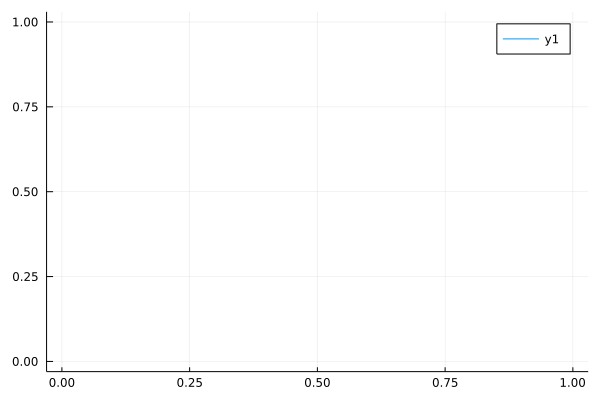

In [38]:
plot(Displacement,Load)

In [39]:
using DelimitedFiles
Disp = writedlm( "DispDataThermoElasticFracture+50.csv",  Displacement, ',')
Force = writedlm("LoadDataThermoElasticFracture+50.csv",  Load, ',')